In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")

In [305]:
df = pd.read_csv("./data/Iris.csv")
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [275]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

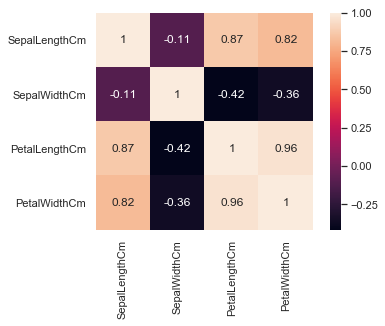

In [276]:
# Correlation of features using seaborn
sns.set(font_scale=1)
sns.heatmap(df.corr(), square= True, cbar= True, annot= True)
plt.show()

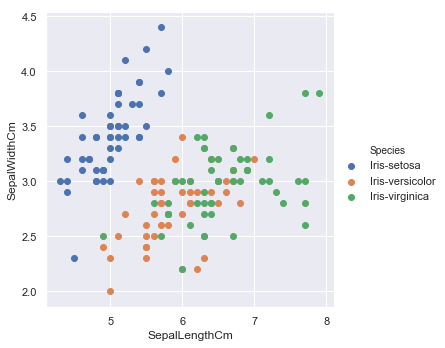

In [277]:
sns.FacetGrid(df, hue="Species", size=5)\
.map(plt.scatter, "SepalLengthCm", "SepalWidthCm")\
.add_legend()

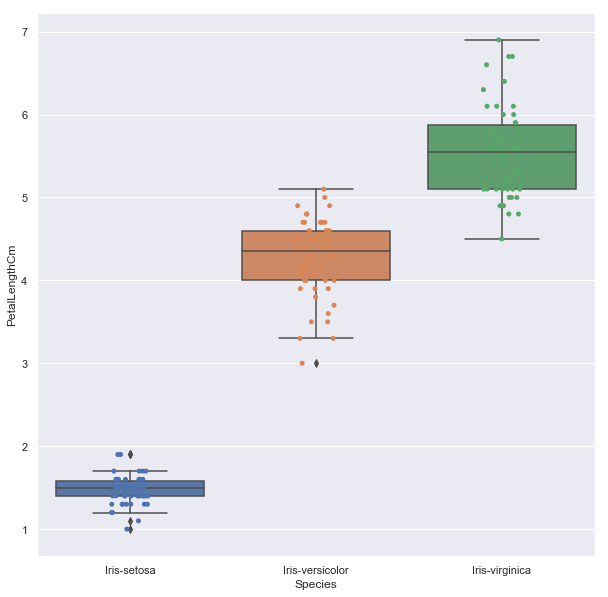

In [278]:
plt.subplots(figsize=(10, 10))
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
sns.stripplot(x="Species", y="PetalLengthCm", data=df, jitter=True, edgecolor="gray")

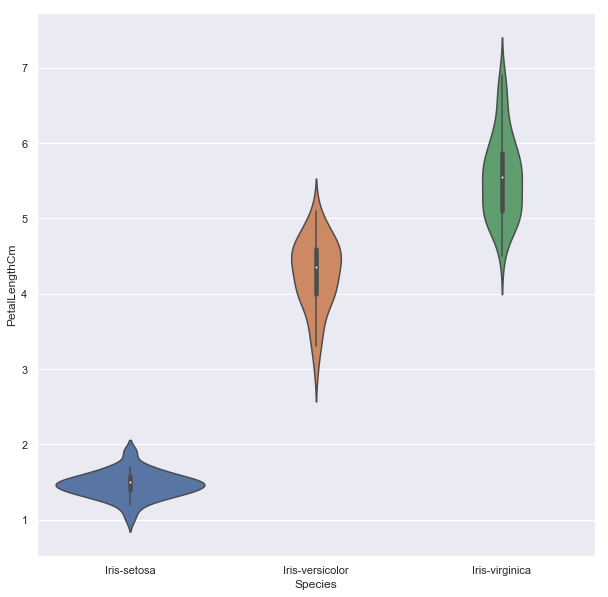

In [279]:
plt.subplots(figsize=(10, 10))
sns.violinplot(x="Species", y="PetalLengthCm", data=df, size=6)

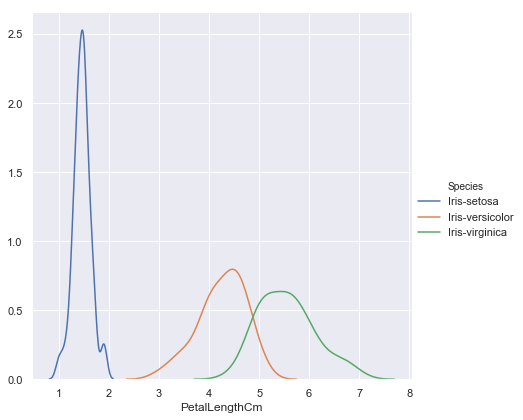

In [280]:
sns.FacetGrid(df, hue="Species", size=6) \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

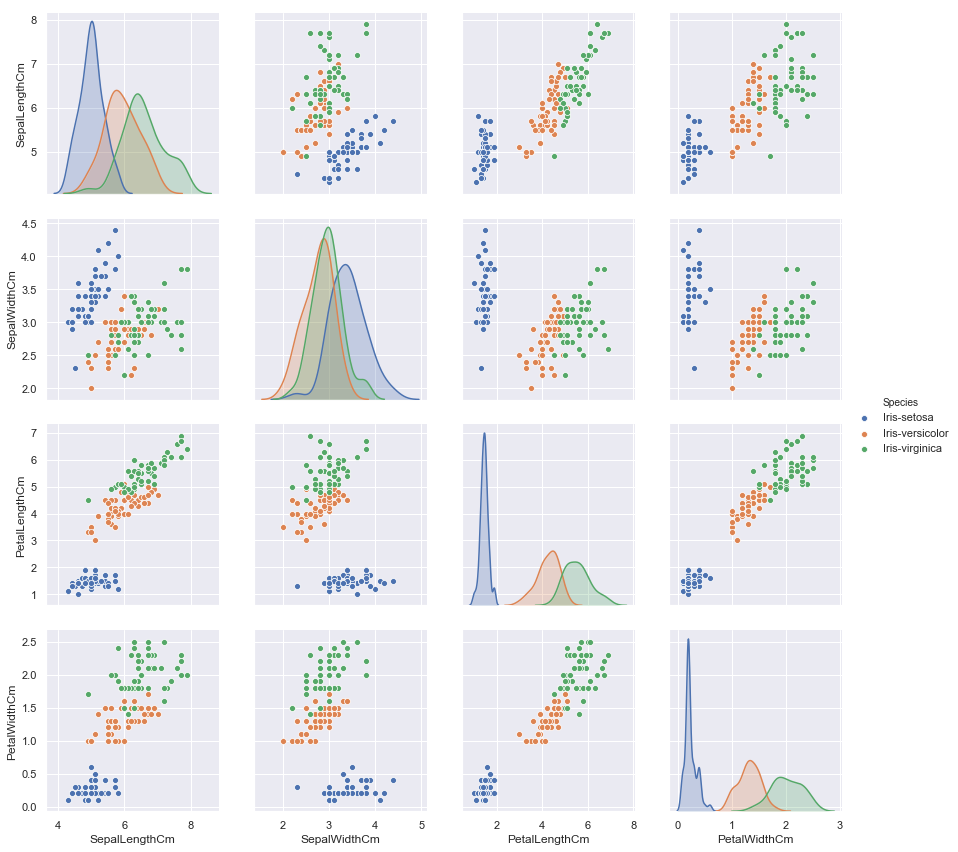

In [282]:
sns.pairplot(df, hue="Species", size=3)

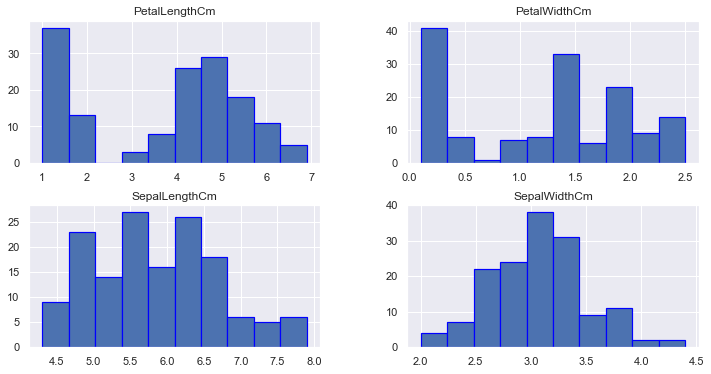

In [283]:
# Distribution of data 
df.hist(edgecolor='blue', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

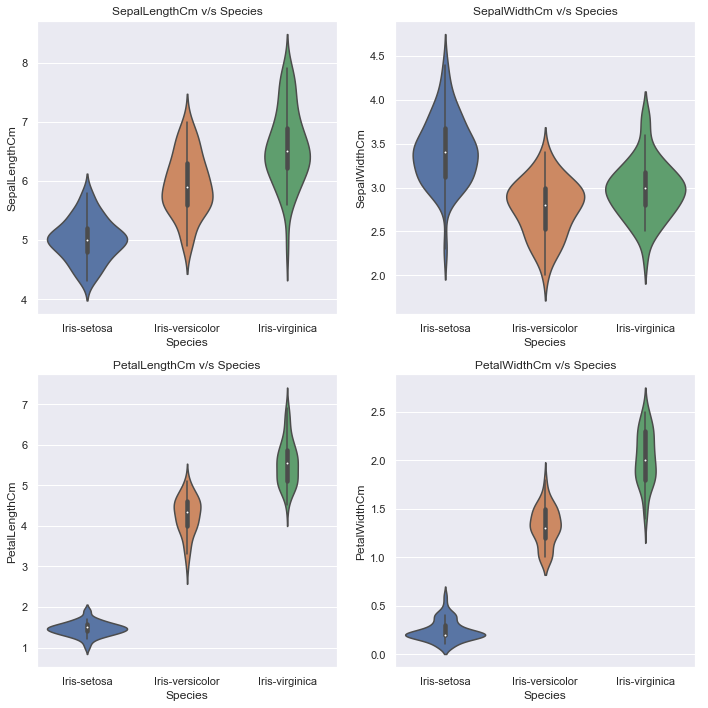

In [284]:
def plot_features(dataset,dep_params,indep_params_list):
    plt.figure(figsize=(10, 10))
    i=0;
    for val in indep_params_list:
        if (val == dep_params):break
        i+=1
        plt.subplot(2,2,i)
        sns.violinplot(x=dep_params,y = val,data=dataset)
        plt.title(val + " v/s " + dep_params)
        plt.tight_layout()
        
plot_features(df,"Species",list(df.columns))

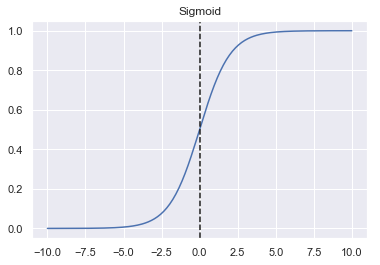

In [341]:
def sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid_func(x))
plt.axvline(x=0, color='k', linestyle='--');
plt.title("Sigmoid");


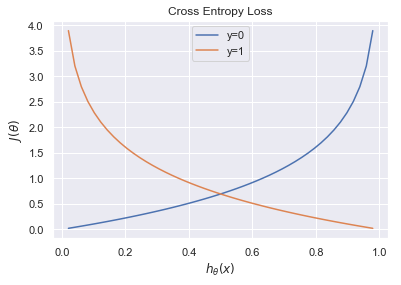

In [342]:
h = np.linspace(0, 1)[1:-1]
for y in [0, 1]:
    plt.plot(h, -y * np.log(h) - (1 - y) * np.log(1 - h), label=f"y={y}")
plt.title("Cross Entropy Loss") 
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

Text(0,0.5,'Petal Width (cm)')

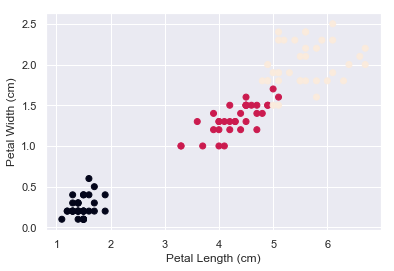

In [359]:
df['Species'] = df['Species'].astype('category').cat.codes
data = np.array(df)
np.random.shuffle(data)
num_train = int(.7 * len(data))  # 80/20 train/test split
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]

plt.scatter(x_train[:,2], x_train[:,3], c=y_train, alpha =1)
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

In [375]:
def sigmoid(X, weight):
    z = np.dot(X, weight)
    return 1/(1+np.exp(-z))

def cost_function(h,y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient_descent(X,h,y):
    return np.dot(X.T,(h-y))/y.shape[0]

def update_weight_gradient(weight, learning_rate, gradient):
    return weight - learning_rate * gradient

start_time = time.time()
def fit_logistic_regression(X, y, max_iter=5000, alpha=0.2):
    X = np.insert(X, 0, 1, axis=1)
    classes = np.unique(y)
    thetas = []
    costs = np.zeros(max_iter)
     
    for c in classes:
        binary_y = np.where( y == c, 1, 0)
        
        theta = np.zeros(X.shape[1])
        for i in range(max_iter):
            h = sigmoid(X, theta)
            costs[i] = cost_function(h,binary_y)
            gradient = gradient_descent(X,h,binary_y)
            theta = update_weight_gradient(theta, alpha, gradient)  
            
        thetas.append(theta)
    return thetas, classes, costs
        
thetas, classes, costs = fit_logistic_regression(x_train[:, 2:], y_train) 
print("Training time (Log Reg using Gradient descent):" + str(time.time() - start_time) + "seconds")

Training time (Log Reg using Gradient descent):0.48196887969970703seconds


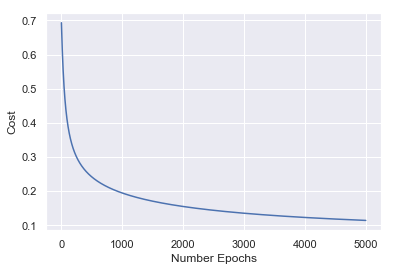

In [376]:
plt.plot(costs)
plt.xlabel('Number Epochs'); 
plt.ylabel('Cost');
X_test = test_df[['PetalLengthCm','PetalWidthCm']].copy()

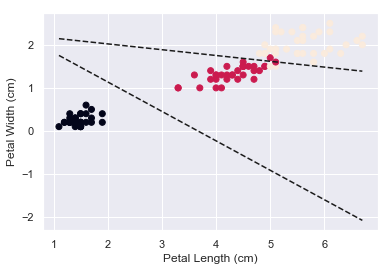

In [377]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train, alpha=1)
plt.xlabel("Petal Length (cm)"); 
plt.ylabel("Petal Width (cm)");
for theta in [thetas[0],thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--") 

In [378]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax(
        [sigmoid(xi, theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]

def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas, x_train[:, 2:], y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_test[:, 2:], y_test):.3f}")

# with two features

Train Accuracy: 0.943
Test Accuracy: 0.933


In [379]:
thetas, classes, costs = fit_logistic_regression(x_train, y_train)
print(f"Train Accuracy: {score(classes, thetas, x_train, y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_test, y_test):.3f}")

# with all the features

Train Accuracy: 0.971
Test Accuracy: 0.978
